In [1]:
# installation des packages
! pip install pandas numpy joblib matplotlib seaborn scikit-learn xgboost streamlit


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# importation des pakages de base
import pandas as pd
import numpy as np
import joblib
import pickle

# package de visualisation des données
import matplotlib.pyplot as plt
import seaborn as sns

# package de machine learning
from sklearn.preprocessing import LabelEncoder, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.svm import SVC

# package interface web pour l'application

import streamlit as st

In [3]:
# chargement des données
df = pd.read_csv(r'C:\Users\HP\Downloads\Financial_inclusion_dataset.csv')
df

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4,48,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2,27,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5,27,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7,30,Female,Parent,Divorced/Seperated,Secondary education,Self employed


In [4]:
# information sur les données
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


In [5]:
# valeurs uniques de chaque colonnes
for col in df.columns:
    unique_values = df[col].unique()
    print(f"Valeurs uniques de la colonne '{col}': {unique_values}")


Valeurs uniques de la colonne 'country': ['Kenya' 'Rwanda' 'Tanzania' 'Uganda']
Valeurs uniques de la colonne 'year': [2018 2016 2017]
Valeurs uniques de la colonne 'uniqueid': ['uniqueid_1' 'uniqueid_2' 'uniqueid_3' ... 'uniqueid_8757'
 'uniqueid_8758' 'uniqueid_8759']
Valeurs uniques de la colonne 'bank_account': ['Yes' 'No']
Valeurs uniques de la colonne 'location_type': ['Rural' 'Urban']
Valeurs uniques de la colonne 'cellphone_access': ['Yes' 'No']
Valeurs uniques de la colonne 'household_size': [ 3  5  8  7  1  6  4 10  2 11  9 12 16 15 13 14 21 18 17 20]
Valeurs uniques de la colonne 'age_of_respondent': [ 24  70  26  34  32  42  54  76  40  69  64  31  38  47  27  48  25  21
  18  22  58  55  62  29  35  45  67  19  80  66  50  33  28  51  16  17
  30  37  59  65  46  56  52  23  43  49  44  72  53  63  39  81  78  36
  20  60  95  71  57  85  68  41  61  75  86  73  93  74  88  90  77  84
  82  89  79  83  94  87  92  91  98  97  96  99 100]
Valeurs uniques de la colonne 'gend

In [6]:
# colonnes dupliquées
df.duplicated().sum()

np.int64(0)

In [7]:
# colonne categorielle 
col_categorielle = df.select_dtypes(include='object').columns
col_categorielle


Index(['country', 'uniqueid', 'bank_account', 'location_type',
       'cellphone_access', 'gender_of_respondent', 'relationship_with_head',
       'marital_status', 'education_level', 'job_type'],
      dtype='object')

In [8]:
# colonne numerique
col_numeriques = df.select_dtypes(include=["int64", "float64"]).columns
col_numeriques

Index(['year', 'household_size', 'age_of_respondent'], dtype='object')

In [9]:
# statistiques descriptives variables catégorielles
df[col_categorielle].describe().T

,count,unique,top,freq
country,23524,4,Rwanda,8735
uniqueid,23524,8735,uniqueid_17,4
bank_account,23524,2,No,20212
location_type,23524,2,Rural,14343
cellphone_access,23524,2,Yes,17454
gender_of_respondent,23524,2,Female,13877
relationship_with_head,23524,6,Head of Household,12831
marital_status,23524,5,Married/Living together,10749
education_level,23524,6,Primary education,12791
job_type,23524,10,Self employed,6437


In [10]:
# statistiques descriptives variables numériques
df[col_numeriques].describe().T

,count,mean,std,min,25%,50%,75%,max
year,23524.0,2016.975939,0.847371,2016.0,2016.0,2017.0,2018.0,2018.0
household_size,23524.0,3.797483,2.227613,1.0,2.0,3.0,5.0,21.0
age_of_respondent,23524.0,38.805220,16.520569,16.0,26.0,35.0,49.0,100.0


In [11]:
# valeurs manquantes
df.isnull().sum()

country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

In [12]:
# Gestion des valeurs abbérantes
# selection des colonnes numeriques
col_numeriques = list(df.select_dtypes(include=["int64","float64"]).columns)

# Initialiser une liste pour stocker les colonnes avec valeurs aberrantes
colonnes_aberrantes = []

def valeurs_aberrantes(data, col_numeriques):
    # Définir le seuil pour identifier les valeurs aberrantes en fonction du score Z
    seuil_z = 3
    # Boucle à travers chaque colonne numérique
    for colonne in col_numeriques:
        # Calculer la moyenne et l'écart-type de la colonne actuelle
        moyenne = data[colonne].mean()
        ecart_type = data[colonne].std()

        # Calculer les scores Z pour la colonne actuelle
        scores_z = (data[colonne] - moyenne) / ecart_type

        # Identifier les valeurs aberrantes pour la colonne actuelle
        valeurs_aberrantes = data[abs(scores_z) > seuil_z]

        # Afficher les valeurs aberrantes pour la colonne actuelle
        if not valeurs_aberrantes.empty:
             colonnes_aberrantes.append(colonne)
             print(f"Voici les valeurs aberrantes dans la colonne '{colonne}' avec zscore = 3 :")
             for index, valeur in valeurs_aberrantes[colonne].items():
                print(f"Ligne: {index}, Valeur: {valeur}")
    print(f"\nIl y a {len(colonnes_aberrantes)} colonnes avec des valeurs aberrantes : {colonnes_aberrantes}")

valeurs_aberrantes(df,col_numeriques)

Voici les valeurs aberrantes dans la colonne 'household_size' avec zscore = 3 :
Ligne: 58, Valeur: 11
Ligne: 348, Valeur: 12
Ligne: 372, Valeur: 16
Ligne: 507, Valeur: 11
Ligne: 674, Valeur: 12
Ligne: 879, Valeur: 11
Ligne: 931, Valeur: 11
Ligne: 1148, Valeur: 16
Ligne: 1403, Valeur: 11
Ligne: 1486, Valeur: 11
Ligne: 1493, Valeur: 15
Ligne: 1599, Valeur: 13
Ligne: 1893, Valeur: 11
Ligne: 1933, Valeur: 11
Ligne: 1999, Valeur: 11
Ligne: 2121, Valeur: 13
Ligne: 2207, Valeur: 12
Ligne: 2373, Valeur: 12
Ligne: 2436, Valeur: 12
Ligne: 2593, Valeur: 12
Ligne: 2599, Valeur: 11
Ligne: 2648, Valeur: 11
Ligne: 2879, Valeur: 11
Ligne: 2886, Valeur: 13
Ligne: 2911, Valeur: 13
Ligne: 2979, Valeur: 12
Ligne: 2988, Valeur: 12
Ligne: 3030, Valeur: 12
Ligne: 3044, Valeur: 11
Ligne: 3081, Valeur: 12
Ligne: 3086, Valeur: 13
Ligne: 3289, Valeur: 11
Ligne: 3370, Valeur: 11
Ligne: 3691, Valeur: 12
Ligne: 3770, Valeur: 11
Ligne: 3849, Valeur: 12
Ligne: 3912, Valeur: 13
Ligne: 3979, Valeur: 11
Ligne: 4045, Val

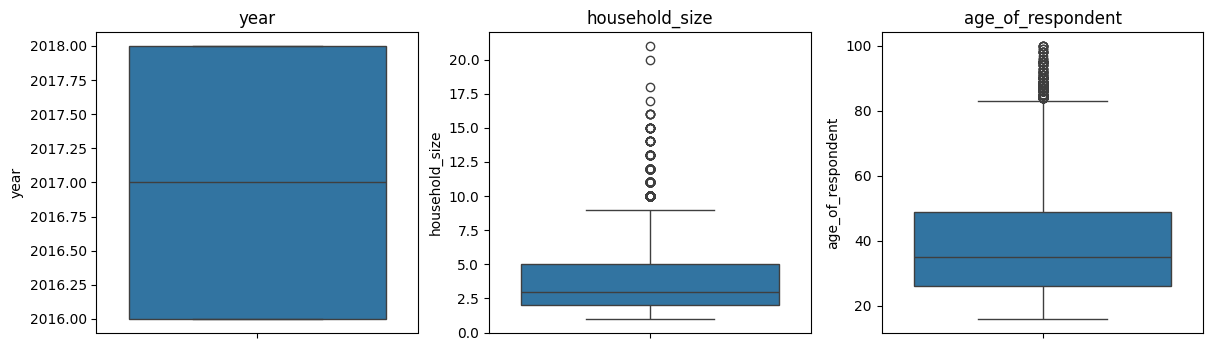

In [13]:
# analyse exploratoire
# Variables quantitatives à afficher
quant_vars = ['year', 'household_size', 'age_of_respondent']

# Créer une figure
plt.figure(figsize=(20,10))

# Créer un boxplot pour chaque variable quantitative
for i, var in enumerate(quant_vars):
    plt.subplot(3, 5, i+1)
    sns.boxplot(data = df, y = var)
    plt.title(var)

# Afficher la figure
plt.tight_layout()
plt.show()

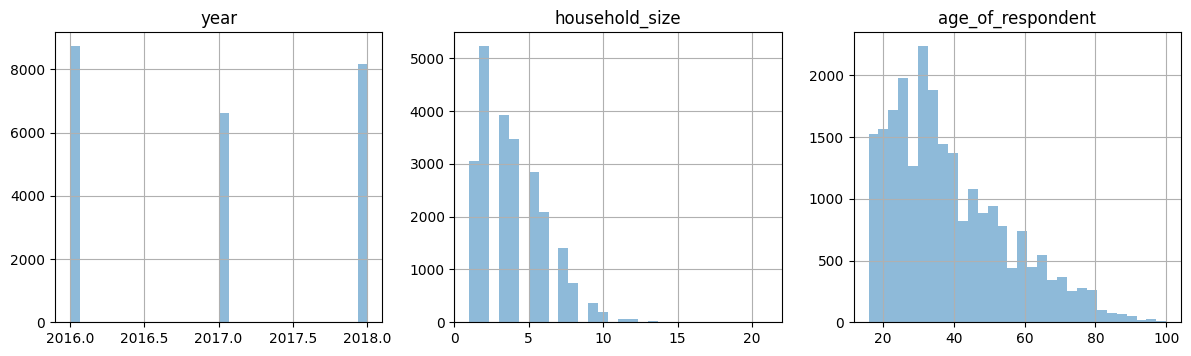

In [14]:
# Créer une figure
plt.figure(figsize=(20,10))

# Créer un histogramme pour chaque variable quantitative
for i, var in enumerate(quant_vars):
    plt.subplot(3, 5, i+1)
    df[var].hist(bins=30, alpha=0.5)
    plt.title(var)

# Afficher la figure
plt.tight_layout()
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_8836\3901807395.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df_copy, x=var, palette="Set2")
C:\Users\HP\AppData\Local\Temp\ipykernel_8836\3901807395.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df_copy, x=var, palette="Set2")
C:\Users\HP\AppData\Local\Temp\ipykernel_8836\3901807395.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df_copy, x=var, palette="Set2")
C:\Users\HP\AppData\Local\Temp\ipykernel_8836\3901807395.py:13: FutureWarning: 

Pass

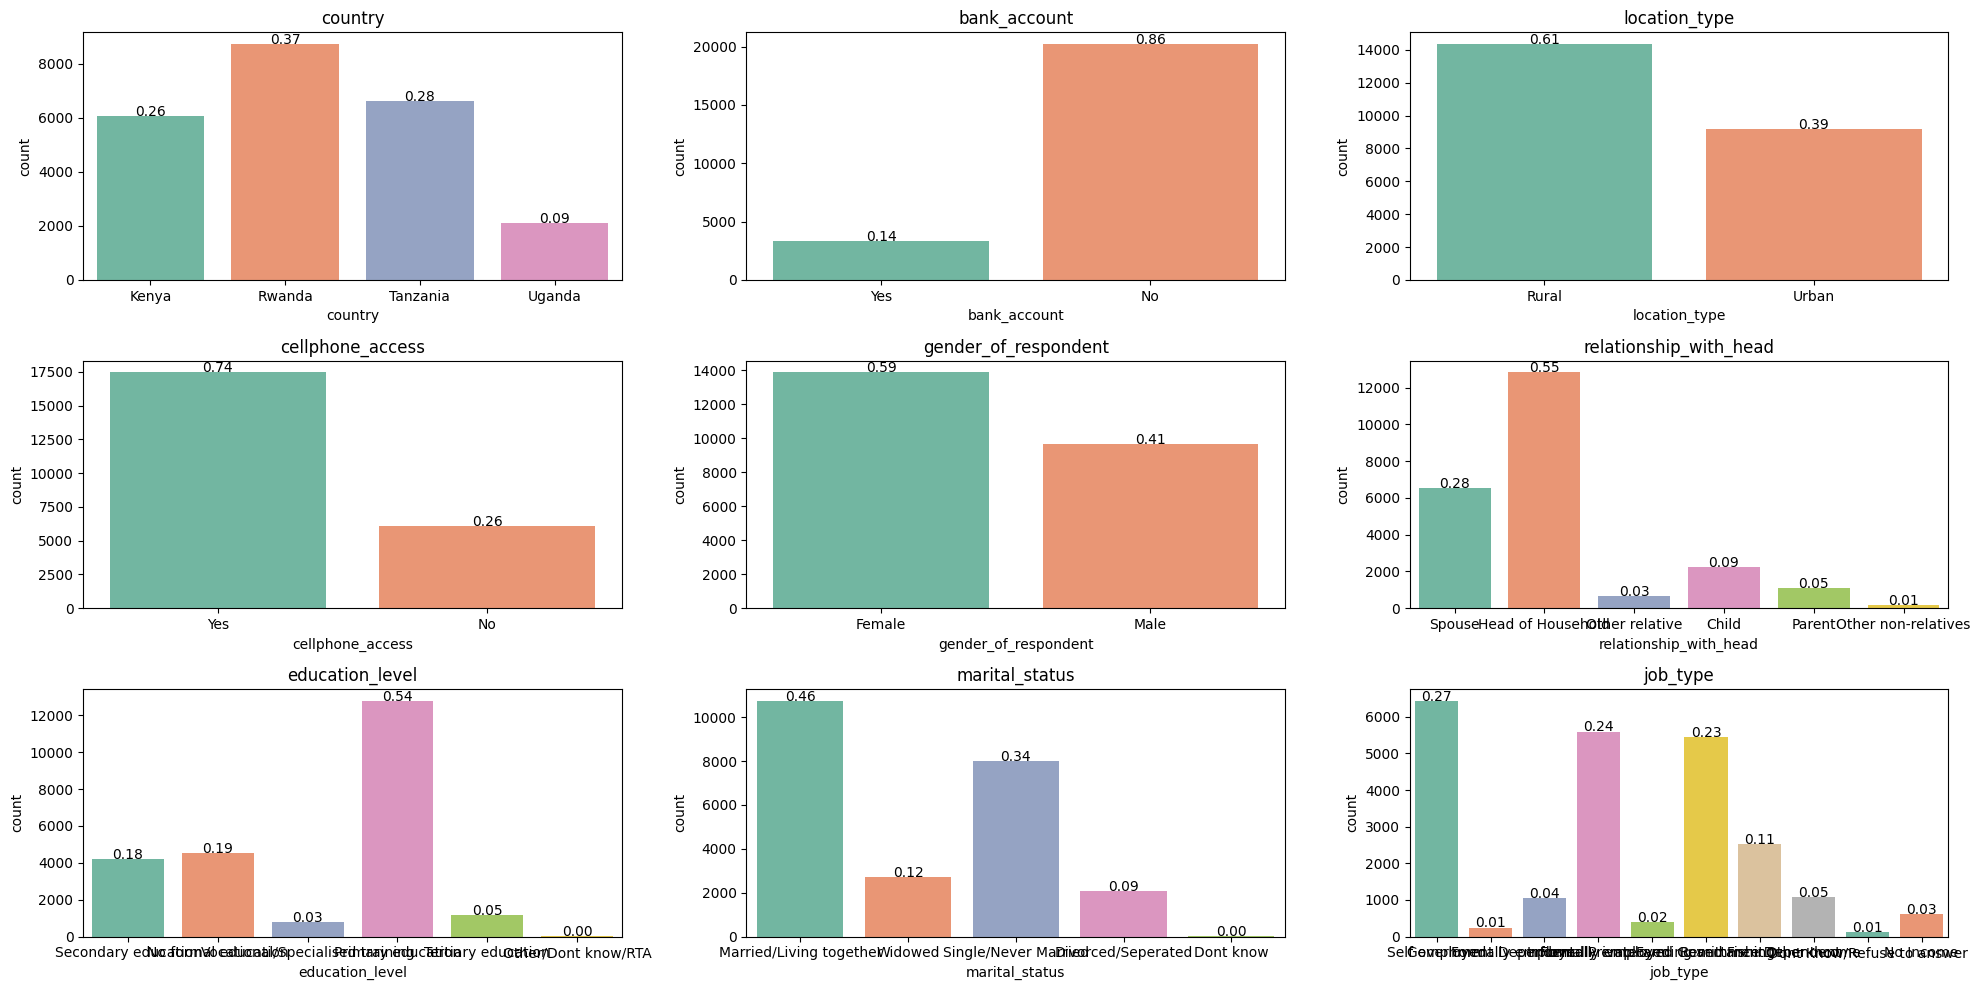

In [15]:
# Variables qualitatives à afficher avec leurs significations respectives
qual_vars =['country', 'bank_account', 'location_type', 'cellphone_access', 'gender_of_respondent', 'relationship_with_head', 'education_level', 'marital_status', 'job_type']

# Créer une copie du DataFrame
df_copy = df.copy()

# Créer une figure
plt.figure(figsize=(20,10))

# Créer un barplot pour chaque variable qualitative
for i, var in enumerate(qual_vars):
    plt.subplot(3, 3, i+1)
    ax = sns.countplot(data=df_copy, x=var, palette="Set2")
    plt.title(var)

    # Ajouter les proportions
    total = float(len(df))
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}'.format(height/total),
                ha="center") 

# Afficher la figure
plt.tight_layout()
plt.show()


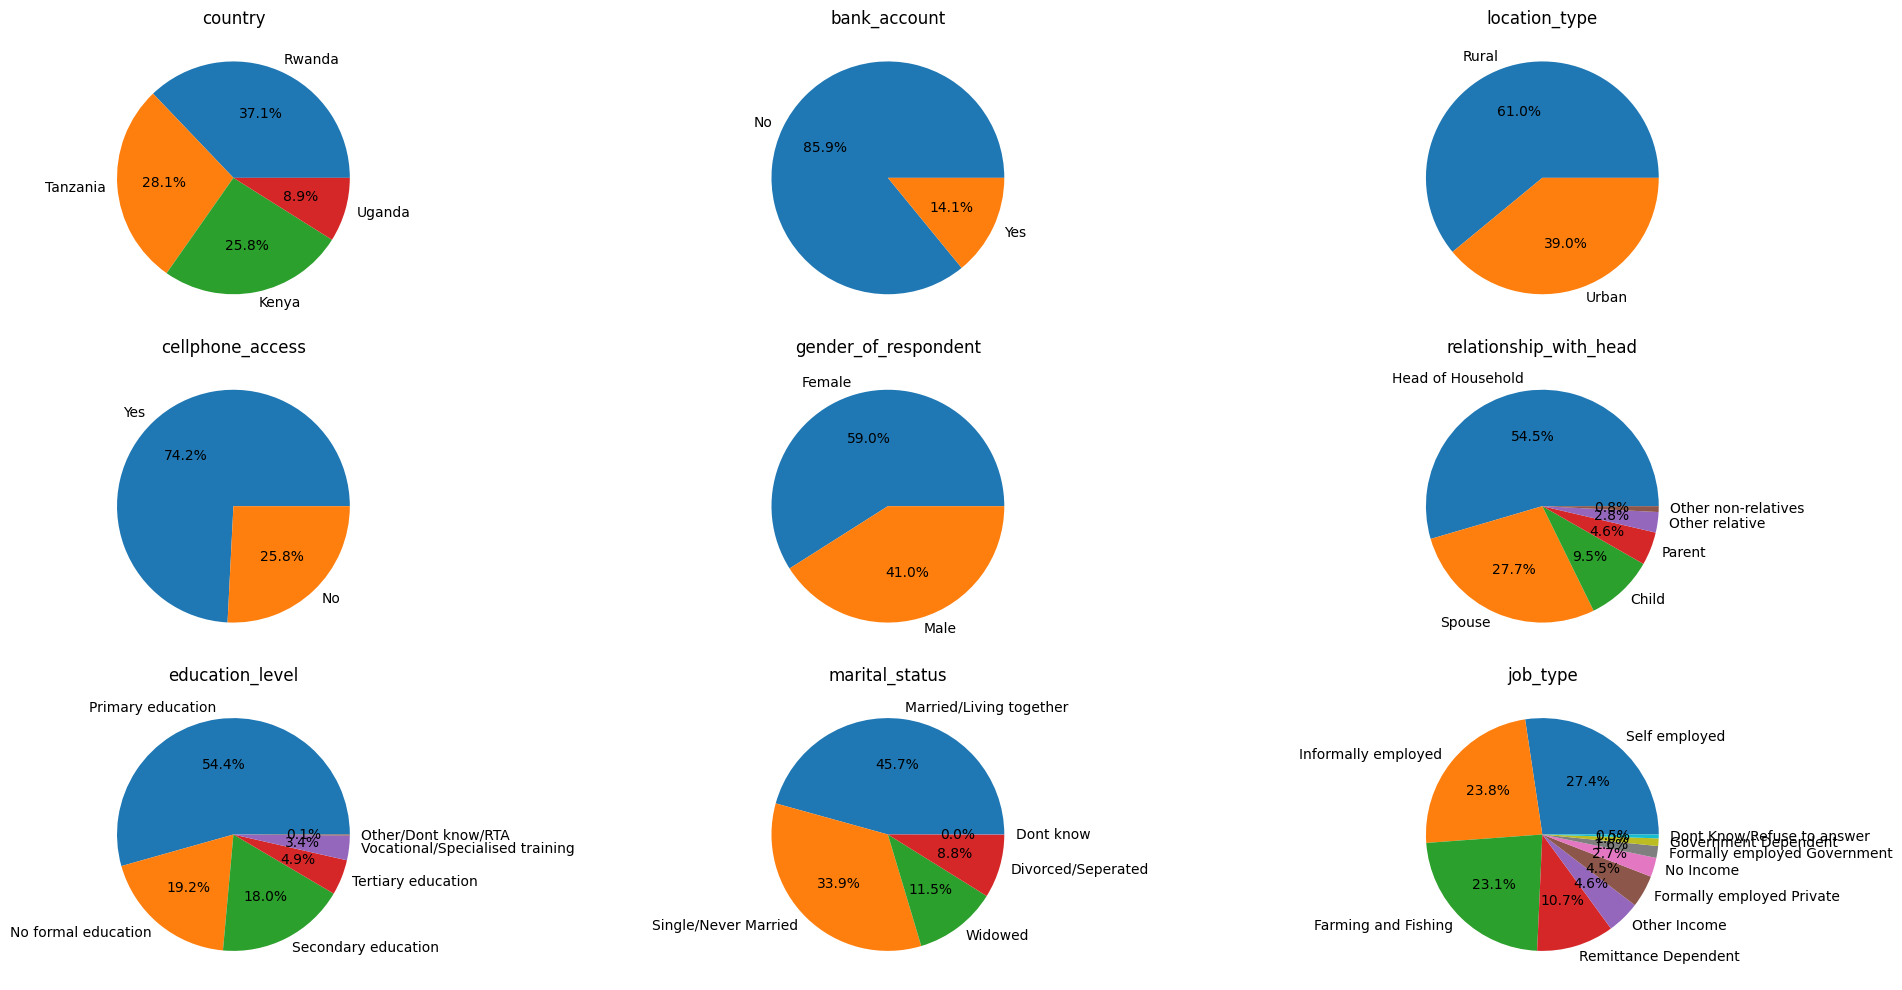

In [16]:
# Créer une figure
plt.figure(figsize=(20,10))

# Créer un piechart pour chaque variable qualitative
for i, var in enumerate(qual_vars):
    plt.subplot(3, 3, i+1)
    df_copy[var].value_counts().plot(kind='pie', autopct='%1.1f%%')
    plt.title(var)
    plt.ylabel('')

# Afficher la figure
plt.tight_layout()
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_8836\1690782747.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df_copy, x = 'bank_account', y = var, palette="Set2")
C:\Users\HP\AppData\Local\Temp\ipykernel_8836\1690782747.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df_copy, x = 'bank_account', y = var, palette="Set2")
C:\Users\HP\AppData\Local\Temp\ipykernel_8836\1690782747.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df_copy, x = 'bank_account', y = var, palette="Set2")


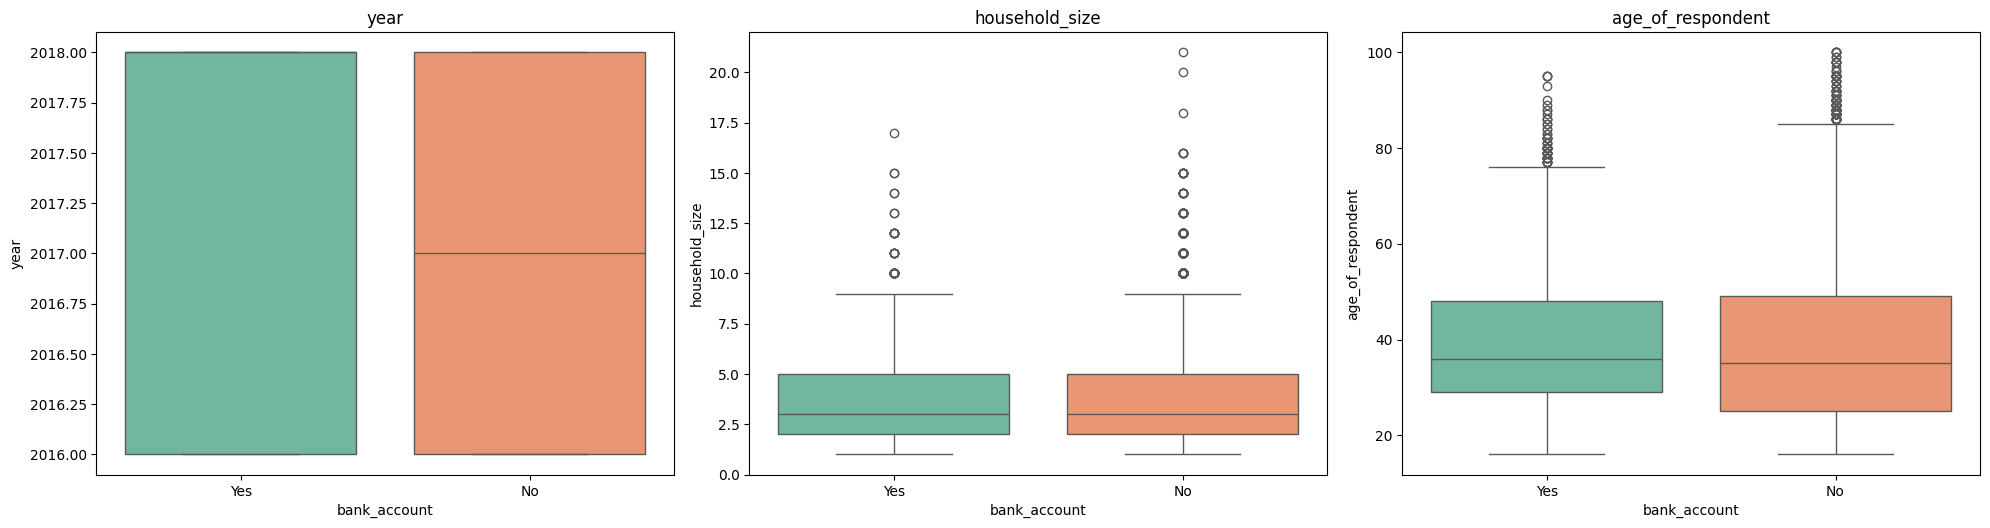

In [17]:
# analyse bivariée
# Créer une figure
plt.figure(figsize=(20,35))

# Créer un boxplot pour chaque variable quantitative
for i, var in enumerate(quant_vars):
    plt.subplot(7, 3, i+1)
    sns.boxplot(data = df_copy, x = 'bank_account', y = var, palette="Set2")
    plt.title(var)

# Afficher la figure
plt.tight_layout()
plt.show()

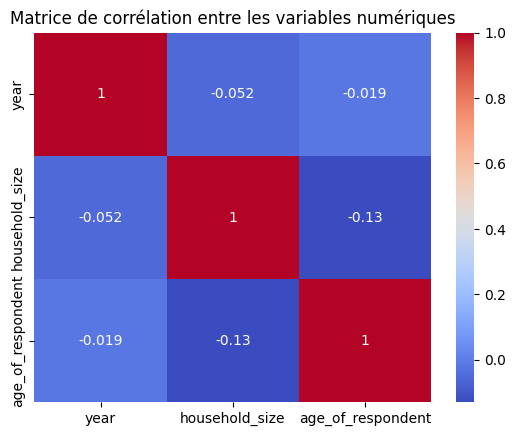

In [18]:
# Corrélation entre les variables numériques
corr_matrix = df.select_dtypes(include=np.number).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matrice de corrélation entre les variables numériques')
plt.show()

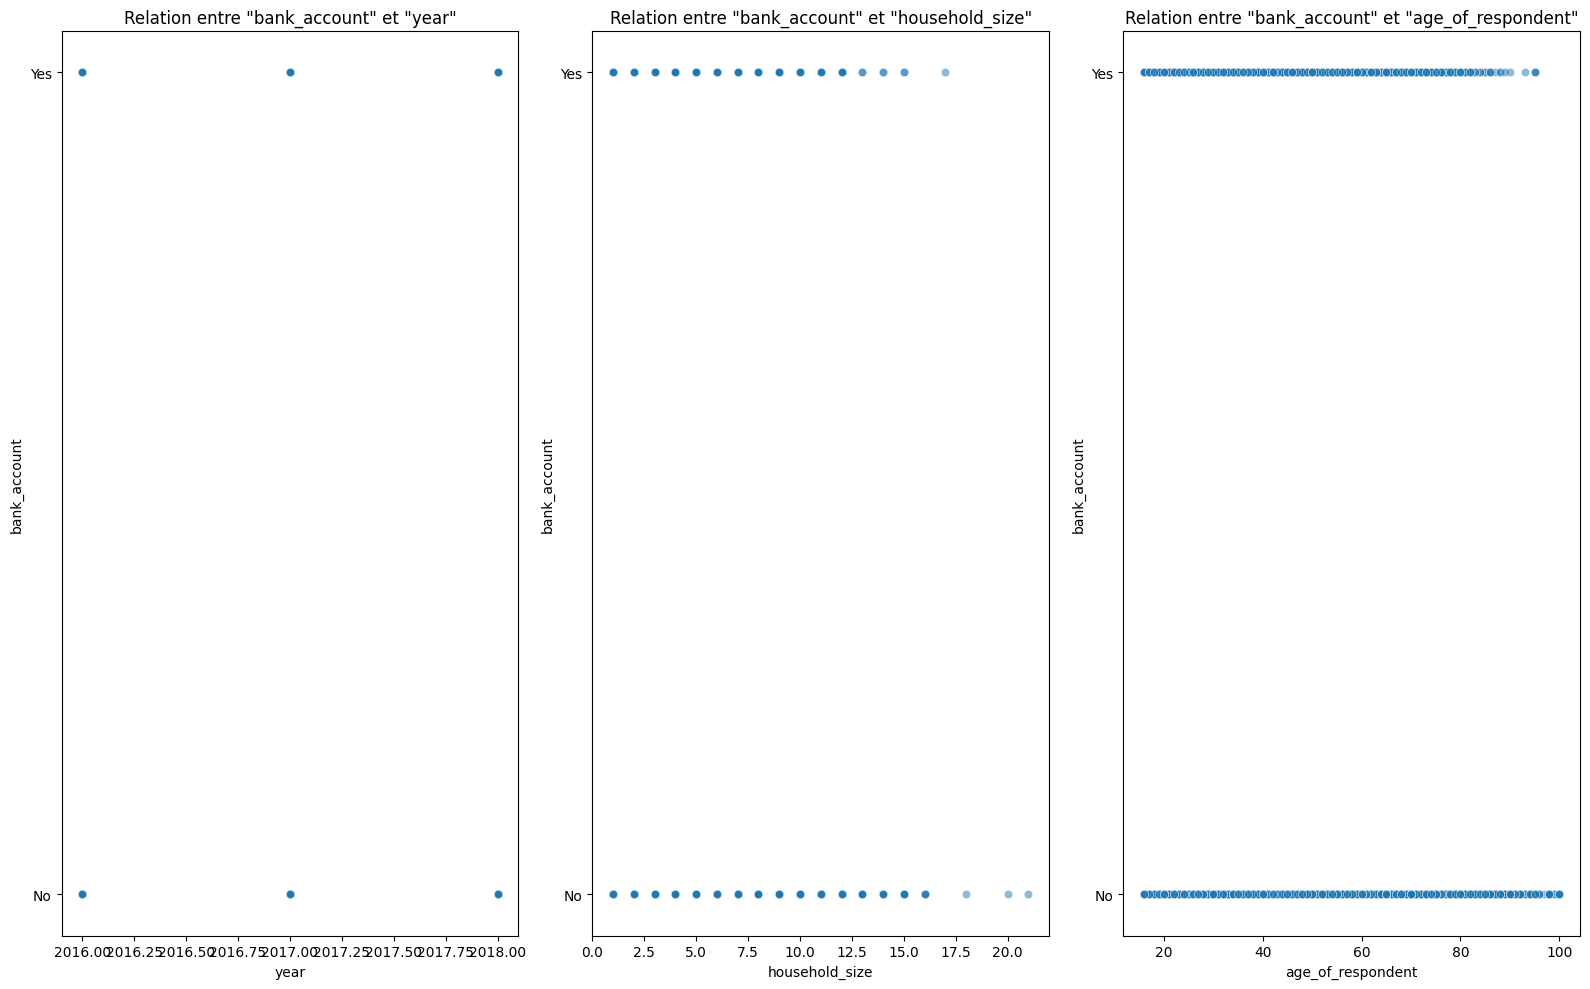

In [19]:
# Relation entre la variable cible 'churn' et les variables numériques
# Sélection des variables numériques
num_vars = df.select_dtypes(include=np.number).columns

# Calcul de la taille de la matrice des subplots en fonction du nombre de variables numériques
n_cols = 3
n_rows = int(np.ceil(len(num_vars) / n_cols))

# Affichage des scatterplots pour chaque variable numérique sur une même figure avec des subplots
fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(16, 10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.scatterplot(x=var, y='bank_account', data=df, alpha=0.5, ax=axs[i])
    axs[i].set_title('Relation entre "bank_account" et "{}"'.format(var))

# Ajout des titres et des étiquettes des axes
plt.tight_layout()
plt.show()

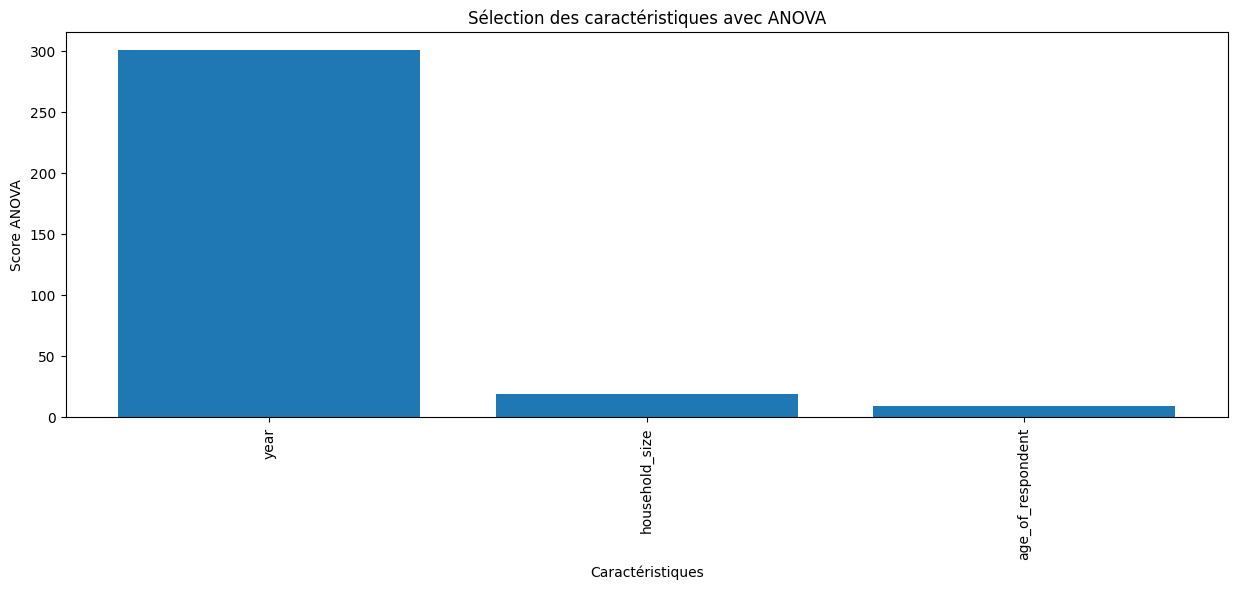

In [20]:
# selection des features numeriques avec ANOVA
# selection des features pertinentes (méthode ANOVA)
from sklearn.feature_selection import SelectKBest, f_classif

# Définir X (features) et y (target) à partir du DataFrame df
X = df.drop(columns=['bank_account']).select_dtypes(include=np.number)  # Exclure la colonne cible et garder les colonnes numériques
y = df['bank_account']  # La colonne cible est 'bank_account'

# Appliquer la fonction SelectKBest avec ANOVA pour sélectionner toutes les caractéristiques
selector = SelectKBest(score_func=f_classif, k="all")  # "all" sans guillemets
X_new = selector.fit_transform(X, y)

# Récupérer les scores ANOVA et trier les indices par ordre décroissant
anova_scores = selector.scores_
sorted_indices = np.argsort(anova_scores)[::-1]

# Récupérer les noms des colonnes triés
sorted_features = X.columns[sorted_indices]

# Afficher la courbe des scores ANOVA
plt.figure(figsize=(15, 5))
plt.bar(x=sorted_features, height=anova_scores[sorted_indices])
plt.xticks(rotation=90)
plt.xlabel('Caractéristiques')
plt.ylabel('Score ANOVA')
plt.title('Sélection des caractéristiques avec ANOVA')
plt.show()


Résultats du test du Chi² pour chaque variable catégorielle:
                  Feature   Chi² Value        P-Value  DoF
5         education_level  3549.125450   0.000000e+00    5
7                job_type  3032.254227   0.000000e+00    9
2        cellphone_access  1032.761084  1.359254e-226    1
0                 country   837.961908  2.529026e-181    3
4  relationship_with_head   327.906656   9.962902e-69    5
3    gender_of_respondent   322.623850   3.884875e-72    1
6          marital_status   193.291872   1.039579e-40    4
1           location_type   178.721031   9.218845e-41    1

Variables catégorielles significativement associées à 'bank_account':
- education_level (p-value: 0.000000)
- job_type (p-value: 0.000000)
- cellphone_access (p-value: 0.000000)
- country (p-value: 0.000000)
- relationship_with_head (p-value: 0.000000)
- gender_of_respondent (p-value: 0.000000)
- marital_status (p-value: 0.000000)
- location_type (p-value: 0.000000)


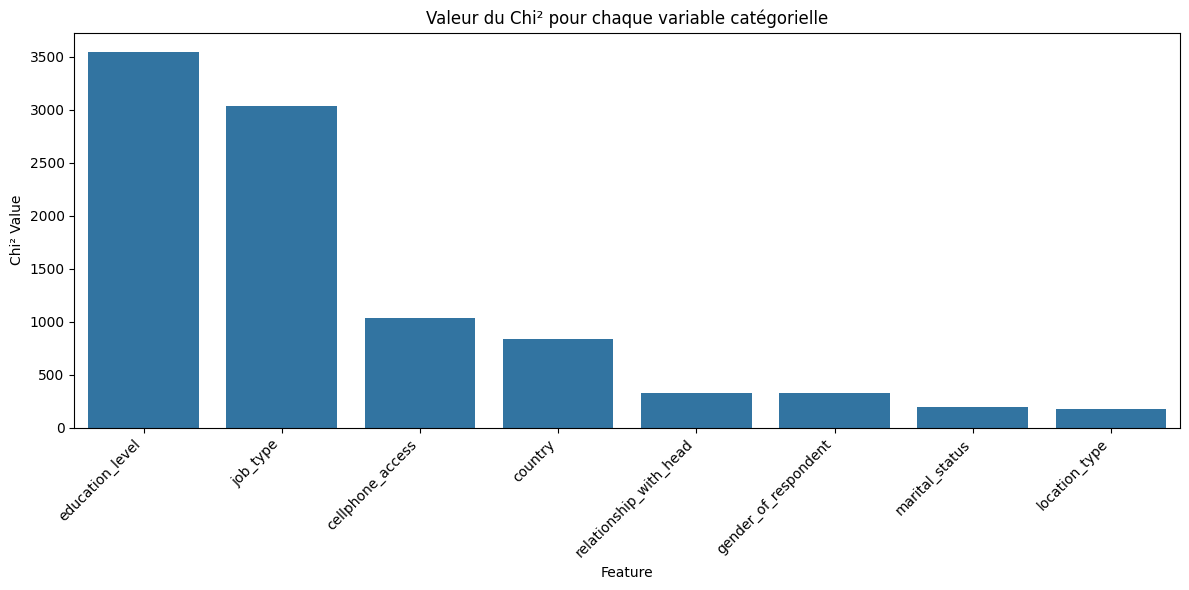

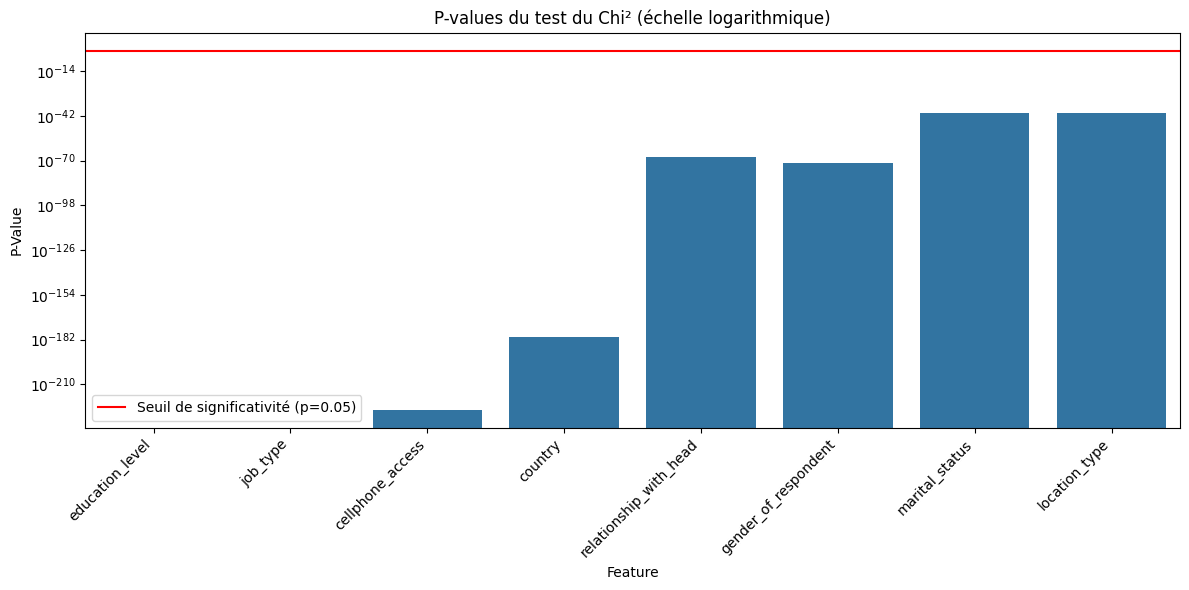


Table de contingence pour education_level vs bank_account:
bank_account                        No    Yes
education_level                              
No formal education              96.10   3.90
Other/Dont know/RTA              68.57  31.43
Primary education                91.45   8.55
Secondary education              76.72  23.28
Tertiary education               48.92  51.08
Vocational/Specialised training  42.96  57.04 % (par ligne)


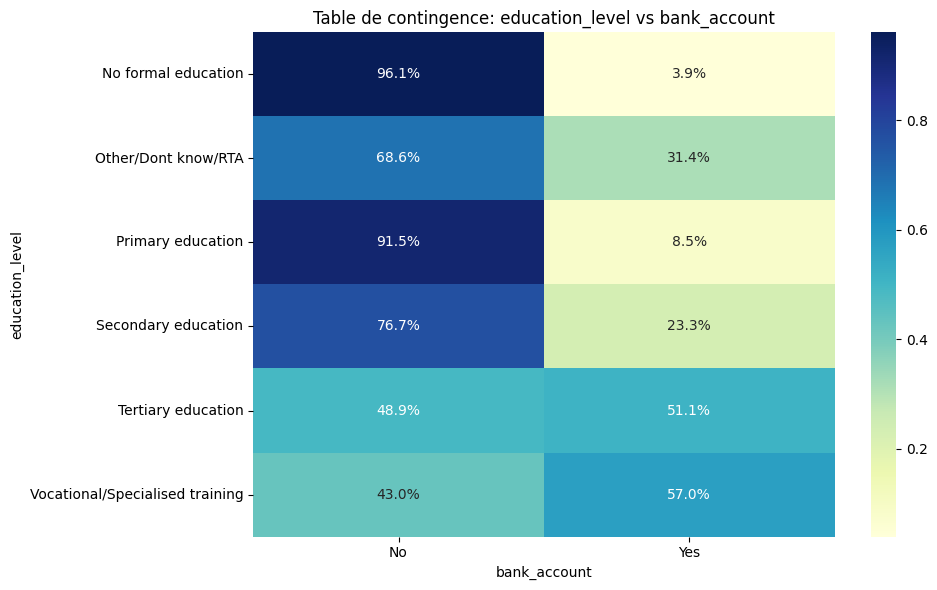

In [21]:
# selection des features catégorielles pertinentes avec le test du Chi²
from scipy.stats import chi2_contingency
# Liste des variables catégorielles
categorical_features = ['country', 'location_type', 'cellphone_access', 
                       'gender_of_respondent', 'relationship_with_head', 
                       'education_level', 'marital_status', 'job_type']

# Variable cible
target = 'bank_account'

# Dictionnaire pour stocker les résultats
chi2_results = {}

# Effectuer le test du chi² pour chaque variable catégorielle
for feature in categorical_features:
    # Créer une table de contingence
    contingency_table = pd.crosstab(df[feature], df[target])
    
    # Effectuer le test du chi²
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    
    # Stocker les résultats
    chi2_results[feature] = {
        'chi2': chi2,
        'p_value': p_value,
        'dof': dof
    }

# Convertir les résultats en DataFrame pour une meilleure lisibilité
results_df = pd.DataFrame({
    'Feature': [feature for feature in chi2_results.keys()],
    'Chi² Value': [chi2_results[feature]['chi2'] for feature in chi2_results.keys()],
    'P-Value': [chi2_results[feature]['p_value'] for feature in chi2_results.keys()],
    'DoF': [chi2_results[feature]['dof'] for feature in chi2_results.keys()]
})

# Trier par valeur du chi² (plus la valeur est élevée, plus la relation est forte)
results_df = results_df.sort_values('Chi² Value', ascending=False)

# Afficher les résultats
print("Résultats du test du Chi² pour chaque variable catégorielle:")
print(results_df)

# Identifier les features significatives (p-value < 0.05)
significant_features = results_df[results_df['P-Value'] < 0.05]['Feature'].tolist()
print("\nVariables catégorielles significativement associées à 'bank_account':")
for feature in significant_features:
    print(f"- {feature} (p-value: {results_df[results_df['Feature'] == feature]['P-Value'].values[0]:.6f})")

# Visualisation des résultats
plt.figure(figsize=(12, 6))
sns.barplot(x='Feature', y='Chi² Value', data=results_df)
plt.title('Valeur du Chi² pour chaque variable catégorielle')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Visualisation des p-values (en échelle logarithmique pour une meilleure lisibilité)
plt.figure(figsize=(12, 6))
sns.barplot(x='Feature', y='P-Value', data=results_df)
plt.axhline(y=0.05, color='r', linestyle='-', label='Seuil de significativité (p=0.05)')
plt.yscale('log')
plt.title('P-values du test du Chi² (échelle logarithmique)')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

# Pour une analyse plus détaillée, vous pouvez examiner les tables de contingence
# Exemple pour la variable la plus significative
most_significant = results_df.iloc[0]['Feature']
print(f"\nTable de contingence pour {most_significant} vs {target}:")
contingency = pd.crosstab(df[most_significant], df[target], normalize='index')
print(contingency.round(4) * 100, "% (par ligne)")

# Visualisation de la table de contingence
plt.figure(figsize=(10, 6))
sns.heatmap(contingency, annot=True, cmap='YlGnBu', fmt='.1%')
plt.title(f'Table de contingence: {most_significant} vs {target}')
plt.tight_layout()
plt.show()

In [22]:
# 1. Sélection des features basée sur la p-value (seuil classique : 0.05)
significant_features = results_df[results_df['P-Value'] < 0.05]['Feature'].tolist()

# Afficher les features sélectionnées
print("\nVariables catégorielles significativement associées à 'bank_account' (p-value < 0.05):")
for feature in significant_features:
    p_value = results_df[results_df['Feature'] == feature]['P-Value'].values[0]
    chi2_value = results_df[results_df['Feature'] == feature]['Chi² Value'].values[0]
    print(f"- {feature}: chi²={chi2_value:.2f}, p-value={p_value:.6f}")

# 2. Alternative : Sélectionner un nombre spécifique de top features
n_top_features = 5  # Choisir les 5 meilleures features selon le chi²
top_features = results_df.head(n_top_features)['Feature'].tolist()

print(f"\nTop {n_top_features} variables catégorielles selon le chi²:")
for feature in top_features:
    chi2_value = results_df[results_df['Feature'] == feature]['Chi² Value'].values[0]
    p_value = results_df[results_df['Feature'] == feature]['P-Value'].values[0]
    print(f"- {feature}: chi²={chi2_value:.2f}, p-value={p_value:.6f}")

# 3. Créer une liste finale des features sélectionnées pour utilisation ultérieure
# (Choisissez l'une des deux approches ci-dessus)
selected_categorical_features = significant_features  # ou top_features

print(f"\nListe finale des features catégorielles sélectionnées: {selected_categorical_features}")


Variables catégorielles significativement associées à 'bank_account' (p-value < 0.05):
- education_level: chi²=3549.13, p-value=0.000000
- job_type: chi²=3032.25, p-value=0.000000
- cellphone_access: chi²=1032.76, p-value=0.000000
- country: chi²=837.96, p-value=0.000000
- relationship_with_head: chi²=327.91, p-value=0.000000
- gender_of_respondent: chi²=322.62, p-value=0.000000
- marital_status: chi²=193.29, p-value=0.000000
- location_type: chi²=178.72, p-value=0.000000

Top 5 variables catégorielles selon le chi²:
- education_level: chi²=3549.13, p-value=0.000000
- job_type: chi²=3032.25, p-value=0.000000
- cellphone_access: chi²=1032.76, p-value=0.000000
- country: chi²=837.96, p-value=0.000000
- relationship_with_head: chi²=327.91, p-value=0.000000

Liste finale des features catégorielles sélectionnées: ['education_level', 'job_type', 'cellphone_access', 'country', 'relationship_with_head', 'gender_of_respondent', 'marital_status', 'location_type']


C:\Users\HP\AppData\Local\Temp\ipykernel_8836\2894902721.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


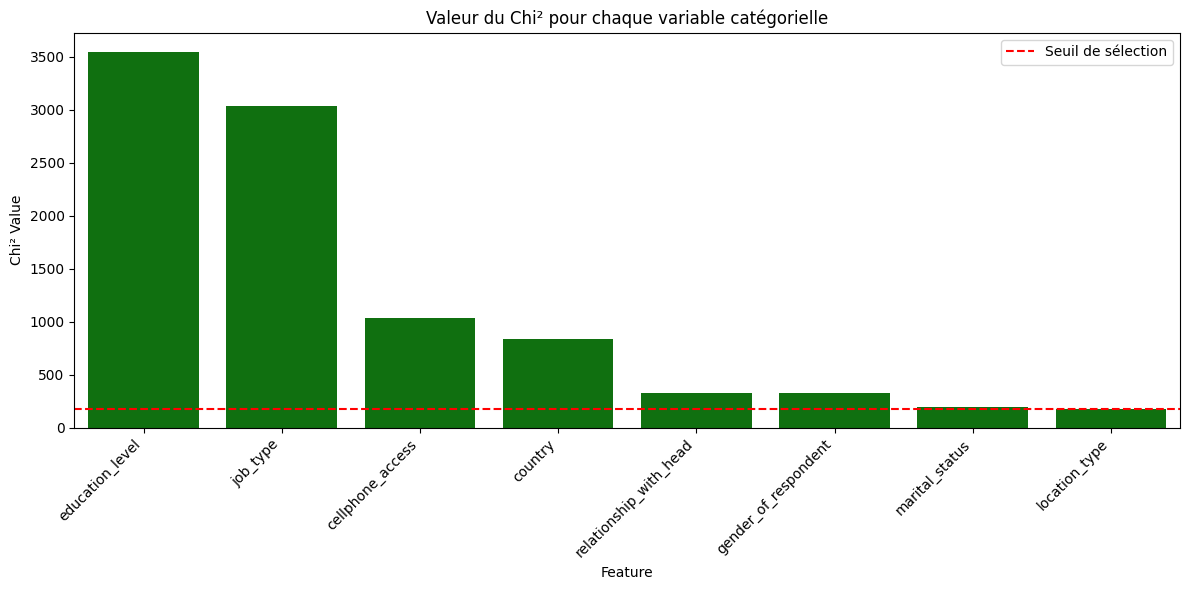

In [23]:
# 4 Visualisation des features sélectionnées vs non sélectionnées


plt.figure(figsize=(12, 6))
sns.barplot(
    x='Feature', 
    y='Chi² Value', 
    data=results_df,
    palette=['green' if feature in selected_categorical_features else 'gray' for feature in results_df['Feature']]
)
plt.title('Valeur du Chi² pour chaque variable catégorielle')
plt.axhline(y=results_df[results_df['P-Value'] < 0.05]['Chi² Value'].min(), 
            color='r', linestyle='--', label='Seuil de sélection')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

In [24]:
# encodage des données avec le mapping
# Application du mappage pour chaque variable selon la structure demandée

# Mappage de 'country'
df['country_encoded'] = df['country'].map({
    'Kenya': 0, 'Rwanda': 1, 'Tanzania': 2, 'Uganda': 3
})

# Mappage de 'location_type'
df['location_type_encoded'] = df['location_type'].map({
    'Rural': 0, 'Urban': 1
})

# Mappage de 'cellphone_access'
df['cellphone_access_encoded'] = df['cellphone_access'].map({
    'Yes': 1, 'No': 0
})

# Mappage de 'gender_of_respondent'
df['gender_of_respondent_encoded'] = df['gender_of_respondent'].map({
    'Female': 0, 'Male': 1
})

# Mappage de 'relationship_with_head'
df['relationship_with_head_encoded'] = df['relationship_with_head'].map({
    'Spouse': 0, 'Head of Household': 1, 'Other relative': 2, 'Child': 3, 'Parent': 4, 'Other non-relatives': 5
})

# Mappage de 'marital_status'
df['marital_status_encoded'] = df['marital_status'].map({
    'Married/Living together': 0, 'Widowed': 1, 'Single/Never Married': 2, 
    'Divorced/Seperated': 3, 'Dont know': 4
})

# Mappage de 'education_level'
df['education_level_encoded'] = df['education_level'].map({
    'Secondary education': 3, 'No formal education': 0, 'Vocational/Specialised training': 5,
    'Primary education': 2, 'Tertiary education': 4, 'Other/Dont know/RTA': 1
})

# Mappage de 'job_type'
df['job_type_encoded'] = df['job_type'].map({
    'Self employed': 0, 'Government Dependent': 1, 'Formally employed Private': 2,
    'Informally employed': 3, 'Formally employed Government': 4, 'Farming and Fishing': 5,
    'Remittance Dependent': 6, 'Other Income': 7, 'Dont Know/Refuse to answer': 8, 'No Income': 9
})

df['bank_account_encoded'] = df['bank_account'].map({'Yes': 1, 'No': 0})

In [25]:
df.columns.tolist()


['country',
 'year',
 'uniqueid',
 'bank_account',
 'location_type',
 'cellphone_access',
 'household_size',
 'age_of_respondent',
 'gender_of_respondent',
 'relationship_with_head',
 'marital_status',
 'education_level',
 'job_type',
 'country_encoded',
 'location_type_encoded',
 'cellphone_access_encoded',
 'gender_of_respondent_encoded',
 'relationship_with_head_encoded',
 'marital_status_encoded',
 'education_level_encoded',
 'job_type_encoded',
 'bank_account_encoded']

In [26]:
# Définir la target et les features
colonne_inutiles = [
    'uniqueid',
    'country',                 # Ajout de la colonne d'origine "country"
    'bank_account',
    'location_type',
    'cellphone_access',
    'gender_of_respondent',
    'relationship_with_head',
    'marital_status',
    'education_level',
    'job_type',
    'bank_account_encoded'
]

y = df['bank_account_encoded']
X = df.drop(columns=colonne_inutiles)


In [27]:
# gestion des lignes comportant valeurs aberrantes avec Robust scaler
scaler_robust = RobustScaler()
df[colonnes_aberrantes] = scaler_robust.fit_transform(df[colonnes_aberrantes])

In [28]:
from sklearn.preprocessing import StandardScaler

# Liste des colonnes numériques dans X
col_numeriques = X.select_dtypes(include=["int64", "float64"]).columns.tolist()

# Colonnes à exclure (valeurs aberrantes + colonnes encodées)
colonnes_a_exclure = colonnes_aberrantes + [
    'country_encoded', 'location_type_encoded', 'cellphone_access_encoded', 
    'gender_of_respondent_encoded', 'relationship_with_head_encoded', 
    'marital_status_encoded', 'education_level_encoded', 
    'job_type_encoded', 'bank_account_encoded'
]

# Sélectionner uniquement les colonnes à standardiser dans X
colonnes_sans_outliers = [col for col in col_numeriques if col not in colonnes_a_exclure]

# Appliquer la standardisation sur X
scaler = StandardScaler()
X[colonnes_sans_outliers] = scaler.fit_transform(X[colonnes_sans_outliers])

print("Colonnes standardisées :", colonnes_sans_outliers)
print(X.head())



Colonnes standardisées : ['year']
       year  household_size  age_of_respondent  country_encoded  \
0  1.208541               3                 24                0   
1  1.208541               5                 70                0   
2  1.208541               5                 26                0   
3  1.208541               5                 34                0   
4  1.208541               8                 26                0   

   location_type_encoded  cellphone_access_encoded  \
0                      0                         1   
1                      0                         0   
2                      1                         1   
3                      0                         1   
4                      1                         0   

   gender_of_respondent_encoded  relationship_with_head_encoded  \
0                             0                               0   
1                             0                               1   
2                             1      

In [29]:
# decoupage des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [30]:
# Entraîner un modèle de régression logistique
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Faire des prédictions
y_pred = model.predict(X_test)

# Évaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8763018065887354
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.98      0.93      4043
           1       0.66      0.24      0.36       662

    accuracy                           0.88      4705
   macro avg       0.78      0.61      0.64      4705
weighted avg       0.86      0.88      0.85      4705

Confusion Matrix:
 [[3961   82]
 [ 500  162]]


In [31]:
from sklearn.ensemble import RandomForestClassifier

# Initialiser le modèle Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Entraîner le modèle
model.fit(X_train, y_train)

# Faire des prédictions
y_pred = model.predict(X_test)

# Évaluation du modèle
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8656748140276301
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.94      0.92      4043
           1       0.53      0.40      0.46       662

    accuracy                           0.87      4705
   macro avg       0.72      0.67      0.69      4705
weighted avg       0.85      0.87      0.86      4705

Confusion Matrix:
 [[3805  238]
 [ 394  268]]


In [32]:
from xgboost import XGBClassifier

# Initialiser le modèle XGBoost
model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)

# Entraîner le modèle
model.fit(X_train, y_train)

# Faire des prédictions
y_pred = model.predict(X_test)

# Évaluation du modèle
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8903294367693942
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94      4043
           1       0.70      0.39      0.50       662

    accuracy                           0.89      4705
   macro avg       0.80      0.68      0.72      4705
weighted avg       0.88      0.89      0.88      4705

Confusion Matrix:
 [[3933  110]
 [ 406  256]]


In [ ]:
# Amelioration du modèle
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE

# Appliquer SMOTE pour rééquilibrer les classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Définir le modèle XGBoost
xgb_model = XGBClassifier(random_state=42)

# Définir les hyperparamètres à tester
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 6, 8],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'scale_pos_weight': [1, 2, 3]  # Ajuster le poids des classes
}

# Recherche des meilleurs hyperparamètres avec GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_resampled, y_resampled)

# Afficher les meilleurs paramètres trouvés
print("Meilleurs paramètres trouvés :", grid_search.best_params_)

# Entraîner le modèle avec les meilleurs paramètres
best_model = grid_search.best_estimator_

# Prédictions sur le test set
y_pred_xgb = best_model.predict(X_test)

# Évaluation du modèle
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))


Fitting 5 folds for each of 1296 candidates, totalling 6480 fits
Meilleurs paramètres trouvés : {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 8, 'n_estimators': 300, 'scale_pos_weight': 1, 'subsample': 0.8}
Accuracy: 0.9247608926673752
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.92      0.95      4043
           1       0.67      0.93      0.78       662

    accuracy                           0.92      4705
   macro avg       0.83      0.93      0.87      4705
weighted avg       0.94      0.92      0.93      4705

Confusion Matrix:
 [[3736  307]
 [  47  615]]


In [39]:
# Sauvegarder le modèle
joblib.dump(model, 'model_final.joblib')
print("Modèle sauvegardé avec joblib sous 'model_final.joblib'")

Modèle sauvegardé avec joblib sous 'model_final.joblib'
